# 01 t-SNE Visualization of NSCLC Dataset

This notebook performs **t-SNE (t-distributed Stochastic Neighbor Embedding)** on the NSCLC dataset  
to visualize the separation between **Normal** and **Tumor** samples in a 2D space.  

- We first load the preprocessed dataset (`datafile.csv`)  
- Scale the features  
- Apply t-SNE  
- Visualize using **Seaborn**  
- Save the t-SNE plot in the `results` folder


## Importing Required Libraries

We import libraries for:

- Data handling: `pandas`  
- Feature scaling: `StandardScaler`  
- t-SNE: `TSNE` from `sklearn.manifold`  
- Plotting: `matplotlib.pyplot` and `seaborn`


In [20]:
import os

# Fix for Windows warning about physical CPU cores in t-SNE
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # replace 4 with your number of cores

import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

We load the processed NSCLC dataset.  
This dataset contains gene expression features and a `Labels` column indicating **Normal** or **Tumor** samples.


In [21]:
# Load dataset
df = pd.read_csv("../data/processed/datafile.csv")

# Preview first few rows
df.head()


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000272537,ENSG00000272538,ENSG00000272539,ENSG00000272540,ENSG00000272541,ENSG00000272542,ENSG00000272543,ENSG00000272544,ENSG00000272545,Labels
0,52.1950,43.8616,14.71010,4.81335,7.40831,112.4260,43.9196,12.12890,13.3027,6.53823,...,0.0,0,0,1.38909,0.312571,0.086774,0,0.0,0.000000,Tumor
1,37.8891,47.0457,7.81233,5.92073,9.83188,39.7146,60.4056,9.20525,19.6343,2.65372,...,0.0,0,0,1.15011,0.050841,0.000000,0,0.0,0.000000,Tumor
2,23.1910,38.1292,12.31170,8.21385,9.68575,25.9596,49.0519,23.92220,20.1660,9.99002,...,0.0,0,0,1.11998,0.551958,0.036071,0,0.0,0.000000,Tumor
3,25.0324,54.3030,8.41631,6.71221,10.92630,80.2073,40.4700,46.93690,20.1807,5.55931,...,0.0,0,0,4.34570,0.319958,0.000000,0,0.0,0.086684,Tumor
4,41.9686,51.2969,8.84999,4.79088,8.36149,38.4429,58.1048,15.60820,23.3442,5.53239,...,0.0,0,0,2.61839,0.415423,0.041381,0,0.0,0.095240,Tumor


## Encoding Labels and Preparing Features

- Convert categorical labels (Normal, Tumor) into numeric form using `LabelEncoder`  
- Separate the dataset into **features (X)** and **labels (y)**  
- Apply **StandardScaler** to the feature matrix before t-SNE


In [22]:
from sklearn import preprocessing

# Encode labels
label_encoder = preprocessing.LabelEncoder()
df['Labels'] = label_encoder.fit_transform(df['Labels'])

# Features and labels
X = df.iloc[:, :-1]  # all columns except Labels
y = df['Labels']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Applying t-SNE

- t-SNE reduces high-dimensional gene expression data into **2 dimensions**  
- Helps visualize clustering or separation of Normal vs Tumor samples


In [23]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


## Visualizing t-SNE

- Scatter plot of the 2D t-SNE projection  
- Colors indicate **Normal** and **Tumor** samples  
- We also **save the plot** into the `results` folder for later use


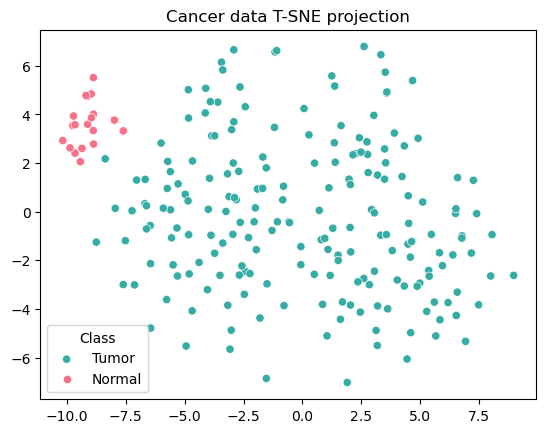

In [24]:
# Plot t-SNE directly without creating a new DataFrame
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=df['Labels'],
    palette=sns.color_palette('husl', 2)
)
plt.title('Cancer data T-SNE projection')

# Add legend explicitly
plt.legend(title='Class', loc='lower left', labels=['Tumor', 'Normal'])

# Save plot
plt.savefig("../results/tsne.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()
